In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import control.matlab as control

In [22]:
Gd = control.tf([1],[5,1])
Gp = control.tf([1],[5,1])
Gv = control.tf([1],[2,1])
num,den = control.pade(1,1)
Gm = control.tf(num,den)
Gm


-s + 2
------
s + 2

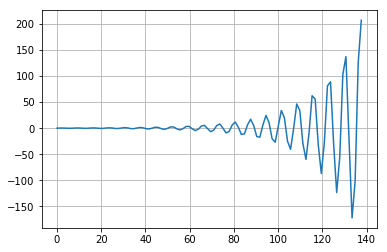

In [31]:
Kc = 10
Gc = control.tf([Kc],1)
Hyd = Gd/(1+Gp*Gv*Gc*Gm)
Hyd


t = np.linspace(0,20,1000)
y,t = control.step(Hyd)
plt.plot(t,y)
plt.grid()

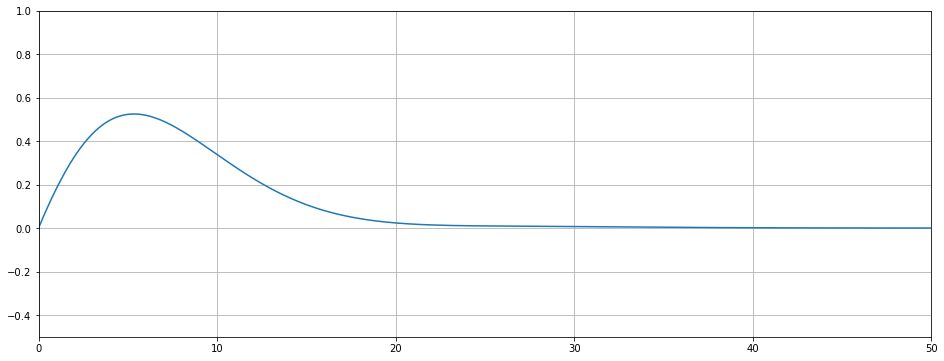

In [35]:
def step_sim(Kp=1,tauI = 20):
    Gc = Kp*control.tf([tauI,1],[tauI,0])
    Hyd = Gd/(1+Gp*Gv*Gc*Gm)
    
    t = np.linspace(0,50,1000)
    y,t = control.step(Hyd,t)
    plt.figure(figsize=(16,6))
    plt.plot(t,y)
    plt.xlim(0,50)
    plt.ylim(-0.5,1)
    plt.grid()
    
from ipywidgets import interact
interact(step_sim,Kp = (0,10,0.1), tauI = (0.1,50,0.1))